<a href="https://colab.research.google.com/github/pihaf/AIO-Excercises/blob/feature%2Fmodule4-week1-linear-regression/linear_regression_numpy_implementation_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [9]:
def get_column(data, index):
  return [row[index] for row in data]

def prepare_data(file_name_dataset):
  data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
  N = len(data)

  # get tv ( index =0)
  tv_data = get_column(data, 0)

  # get radio ( index =1)
  radio_data = get_column(data, 1)

  # get newspaper ( index =2)
  newspaper_data = get_column(data, 2)
  # get sales ( index =3)
  sales_data = get_column(data, 3)
  # building X input and y output for training
  X = [tv_data, radio_data, newspaper_data]
  y = sales_data
  return X, y

In [23]:
X, y = prepare_data('advertising.csv')
list = [sum(X[0][:5]), sum(X[1][:5]), sum(X [2][:5]), sum(y[:5])]
print(list)

[624.1, 175.10000000000002, 300.5, 78.9]


In [34]:
def initialize_params():
  w1 = random.gauss(mu=0.0, sigma=0.01)
  w2 = random.gauss(mu=0.0, sigma=0.01)
  w3 = random.gauss(mu=0.0, sigma=0.01)
  b = 0
  #w1 , w2 , w3 , b = (0.016992259082509283 , 0.0070783670518262355 ,-0.002307860847821344 , 0)
  return w1, w2, w3, b

In [15]:
def predict(x1, x2, x3, w1, w2, w3, b):
  y_hat = w1 * x1 + w2 * x2 + w3 * x3 + b
  return y_hat

y = predict(x1 =1, x2 =1, x3 =1, w1 =0, w2 =0.5, w3 =0, b =0.5)
print(y)

1.0


In [14]:
def compute_loss(y_hat, y):
  return (y_hat - y) ** 2

l = compute_loss(1, 0.5)
print(l)

0.25


In [17]:
def compute_gradient_wi(xi, y, y_hat):
  dl_dwi = 2 * (y_hat - y) * xi
  return dl_dwi

def compute_gradient_b(y, y_hat):
  dl_db = 2 * (y_hat - y)
  return dl_db

g_wi = compute_gradient_wi(xi =1.0, y =1.0, y_hat =0.5)
print(g_wi)
g_b = compute_gradient_b(y =2.0, y_hat =0.5)
print(g_b)

-1.0
-3.0


In [19]:
def update_weight_wi(wi, dl_dwi, lr):
  wi = wi - lr * dl_dwi
  return wi

def update_weight_b(b, dl_db, lr):
  b = b - lr * dl_db
  return b

after_wi = update_weight_wi(wi =1.0, dl_dwi = -0.5, lr = 1e-5)
print(after_wi)
after_b = update_weight_b(b =0.5, dl_db = -1.0, lr = 1e-5)
print(after_b)

1.000005
0.50001


In [25]:
def compute_loss_mse(y, y_hat):
  return (y_hat - y) ** 2

In [26]:
def implement_linear_regression(X_data, y_data, epoch_max = 50, lr = 1e-5):
  losses = []

  w1, w2, w3, b = initialize_params()

  N = len(y_data)
  for epoch in range(epoch_max):
    for i in range(N):
      # get a sample
      x1 = X_data[0][i]
      x2 = X_data[1][i]
      x3 = X_data[2][i]

      y = y_data[i]

      # compute output
      y_hat = predict(x1, x2, x3, w1, w2, w3, b)

      # compute loss
      loss = compute_loss_mse(y, y_hat)

      # compute gradient w1 , w2 , w3 , b
      dl_dw1 = compute_gradient_wi(x1, y, y_hat)
      dl_dw2 = compute_gradient_wi(x2, y, y_hat)
      dl_dw3 = compute_gradient_wi(x3, y, y_hat)
      dl_db = compute_gradient_b(y, y_hat)
      # update parameters
      w1 = update_weight_wi(w1, dl_dw1, lr)
      w2 = update_weight_wi(w2, dl_dw2, lr)
      w3 = update_weight_wi(w3, dl_dw3, lr)
      b = update_weight_b(b, dl_db, lr)

      # logging
      losses.append(loss)
  return (w1, w2, w3,b, losses)

### Testing Linear Regression Function

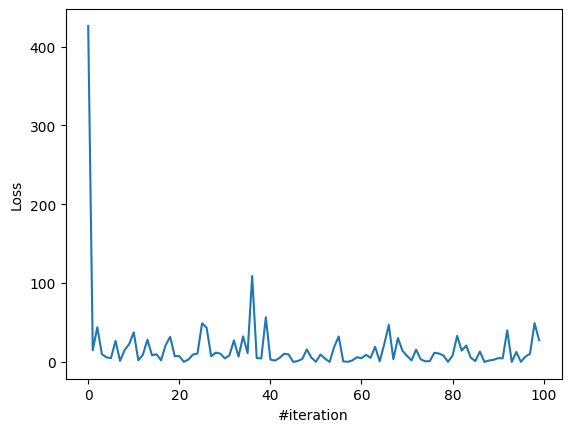

In [27]:
(w1, w2, w3,b, losses) = implement_linear_regression(X, y)
plt.plot(losses[:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

In [28]:
X, y = prepare_data('advertising.csv')
(w1, w2, w3,b, losses) = implement_linear_regression(X, y)
print(w1, w2, w3)

0.0740598597076549 0.1591736517149108 0.017561219637991184


### Testing on new data

In [29]:
# given new data
tv = 19.2
radio = 35.9
newspaper = 51.3

X, y = prepare_data('advertising.csv')
(w1, w2, w3,b, losses) = implement_linear_regression(X, y, epoch_max =50, lr =1e-5)
sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'predicted sales is { sales }')

predicted sales is 8.1764410976378


In [30]:
def compute_loss_mae(y, y_hat):
  return abs(y_hat - y)

l = compute_loss_mae(1, 0.5)
print(l)

0.5


### Linear Regression with Batch

In [35]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max=50, lr=1e-5):
  losses = []

  w1, w2, w3, b = initialize_params()
  N = len(y_data)

  for epoch in range(epoch_max):
    loss_total = 0.0
    dw1_total = 0.0
    dw2_total = 0.0
    dw3_total = 0.0
    db_total = 0.0
    for i in range(N):
      x1 = X_data[0][i]
      x2 = X_data[1][i]
      x3 = X_data[2][i]

      y = y_data[i]

      y_hat = predict(x1, x2, x3, w1, w2, w3, b)

      loss = compute_loss_mse(y, y_hat)

      # accumulate loss
      loss_total += loss

      # compute gradient w1 , w2 , w3 , b
      dl_dw1 = compute_gradient_wi(x1, y, y_hat)
      dl_dw2 = compute_gradient_wi(x2, y, y_hat)
      dl_dw3 = compute_gradient_wi(x3, y, y_hat)
      dl_db = compute_gradient_b(y, y_hat)

      # accumulate gradient
      dw1_total += dl_dw1
      dw2_total += dl_dw2
      dw3_total += dl_dw3
      db_total += dl_db

    # compute average
    dw1_total /= N
    dw2_total /= N
    dw3_total /= N
    db_total /= N

    # update params
    w1 = update_weight_wi(w1, dw1_total, lr)
    w2 = update_weight_wi(w2, dw2_total, lr)
    w3 = update_weight_wi(w3, dw3_total, lr)
    b = update_weight_b(b, db_total, lr)

    # logging
    losses.append(loss_total/N)

  return (w1, w2, w3, b, losses)

[254.6241111459379, 51.75276017180929, 19.595320749891172, 14.377467171282428, 13.414237455385384, 13.126254510551213, 12.948640280081408, 12.792150665795127, 12.64259115859067, 12.497612187025709, 12.356736522970591, 12.219785689165741, 12.086631571715728, 11.957157127824665, 11.831250087949552, 11.70880186693612, 11.589707300030534, 11.473864511944285, 11.361174809724446, 11.251542582103776, 11.144875202510667, 11.041082935211431, 10.940078844420814, 10.84177870627712, 10.746100923589976, 10.652966443273046, 10.562298676377287, 10.47402342064259, 10.388068785488471, 10.30436511936714, 10.222844939404206, 10.143442863255348, 10.066095543108661, 9.990741601765517, 9.917321570734106, 9.845777830272453, 9.776054551319408, 9.708097639254104, 9.641854679426345, 9.577274884402067, 9.514309042869831, 9.45290947015607, 9.393029960298358, 9.334625739627636, 9.277653421811788, 9.222070964314671, 9.167837626225847, 9.114913927417906, 9.063261608989567, 9.012843594954001, 8.963623955133219, 8.915

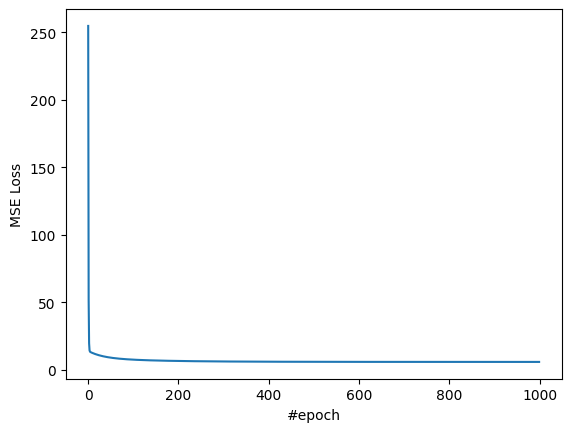

In [32]:
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(X, y, epoch_max=1000, lr=1e-5)
print(losses)
plt.plot(losses)
plt.xlabel("#epoch")
plt.ylabel("MSE Loss")
plt.show()

In [37]:
X, y = prepare_data('advertising.csv')
# using MSE loss
(w1, w2, w3,b, losses) = implement_linear_regression_nsamples(X, y,epoch_max =1000,lr =1e-5)
print(w1, w2, w3)

0.06710990754044266 0.15756173831487585 0.029619799386084403


## Implementation with feature list

In [48]:
def prepare_data(file_name_dataset):
  data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
  N = len(data)

  # get tv ( index =0)
  tv_data = get_column(data, 0)

  # get radio ( index =1)
  radio_data = get_column(data, 1)

  # get newspaper ( index =2)
  newspaper_data = get_column(data, 2)
  # get sales ( index =3)
  sales_data = get_column(data, 3)
  # building X input and y output for training
  # Create list of features for input
  X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
  y = sales_data
  return X, y

def initialize_params():
  bias = 0
  w1 = random.gauss(mu=0.0, sigma=0.01)
  w2 = random.gauss(mu=0.0, sigma=0.01)
  w3 = random.gauss(mu=0.0, sigma=0.01)
  # comment this line for real application
  return [0 , -0.01268850433497871 , 0.004752496982185252 , 0.0073796171538643845]
  #return [bias, w1, w2, w3]

def predict(X_features, weights):
  result = np.dot(X_features, weights)
  return result

def compute_loss(y_hat, y):
  return (y_hat - y) ** 2

def compute_gradient_w(X_features, y, y_hat):
  dl_dw = [2 * (y_hat - y) * x for x in X_features]
  return dl_dw

def update_weight(weights, dl_dw, lr):
  for i in range(len(weights)):
    weights[i] = weights[i] - lr * dl_dw[i]  # Update each weight element
  return weights

epoch  0
epoch  1
epoch  2
epoch  3
epoch  4
epoch  5
epoch  6
epoch  7
epoch  8
epoch  9
epoch  10
epoch  11
epoch  12
epoch  13
epoch  14
epoch  15
epoch  16
epoch  17
epoch  18
epoch  19
epoch  20
epoch  21
epoch  22
epoch  23
epoch  24
epoch  25
epoch  26
epoch  27
epoch  28
epoch  29
epoch  30
epoch  31
epoch  32
epoch  33
epoch  34
epoch  35
epoch  36
epoch  37
epoch  38
epoch  39
epoch  40
epoch  41
epoch  42
epoch  43
epoch  44
epoch  45
epoch  46
epoch  47
epoch  48
epoch  49


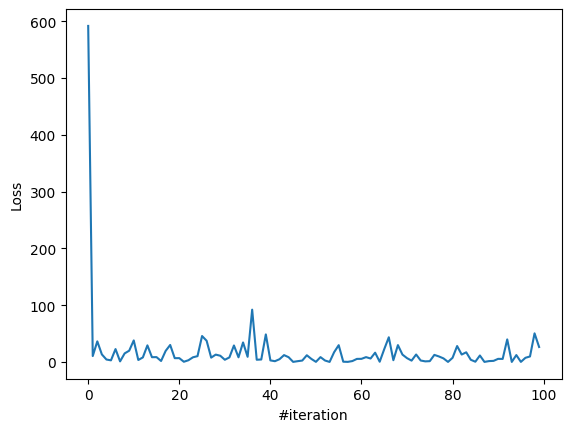

In [49]:
def implement_linear_regression(X_features, y_output, epoch_max=50, lr=1e-5):
  losses = []
  weights = initialize_params()
  N = len(y_output)
  for epoch in range(epoch_max):
    #print("epoch ", epoch)
    for i in range(N):
      features_i = X_features[i]
      y = y_output[i]

      y_hat = predict(features_i, weights)
      loss = compute_loss(y, y_hat)
      dl_dw = compute_gradient_w(features_i, y, y_hat)
      weights = update_weight(weights, dl_dw, lr)

      # accumulate loss
      losses.append(loss)
  return weights, losses

X, y = prepare_data('advertising.csv')
W, L = implement_linear_regression(X, y)
plt.plot(L[0:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

In [50]:
X, y = prepare_data('advertising.csv')
W, L = implement_linear_regression(X, y, epoch_max =50, lr =1e-5)
# Print loss value at iteration 9999
print(L[9999])

epoch  0
epoch  1
epoch  2
epoch  3
epoch  4
epoch  5
epoch  6
epoch  7
epoch  8
epoch  9
epoch  10
epoch  11
epoch  12
epoch  13
epoch  14
epoch  15
epoch  16
epoch  17
epoch  18
epoch  19
epoch  20
epoch  21
epoch  22
epoch  23
epoch  24
epoch  25
epoch  26
epoch  27
epoch  28
epoch  29
epoch  30
epoch  31
epoch  32
epoch  33
epoch  34
epoch  35
epoch  36
epoch  37
epoch  38
epoch  39
epoch  40
epoch  41
epoch  42
epoch  43
epoch  44
epoch  45
epoch  46
epoch  47
epoch  48
epoch  49
31.339223408109948
